In [1]:
# ignore_cell
# You can safely ignore this cell

# add pyomeca to local path (to make it usable in binder server)
import sys

sys.path.append("..")

# Plot style
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("svg")
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
plt.style.use("seaborn-ticks")
%matplotlib inline
# %load_ext lab_black

#### Application: electromyographic pipeline

Pyomeca implements specialized functionalities commonly used in biomechanics. As an example, let's process the electromyographic data contained in this [`c3d file`](https://github.com/romainmartinez/pyomeca/blob/master/tests/data/markers_analogs.c3d).

You can follow along without installing anything by using our binder server: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/romainmartinez/pyomeca/master?filepath=notebooks)

In [2]:
from pyomeca import Analogs

data_path = "../tests/data/markers_analogs.c3d"
muscles = [
    "Delt_ant",
    "Delt_med",
    "Delt_post",
    "Supra",
    "Infra",
    "Subscap",
]
emg = Analogs.from_c3d(data_path, suffix_delimiter=".", usecols=muscles)

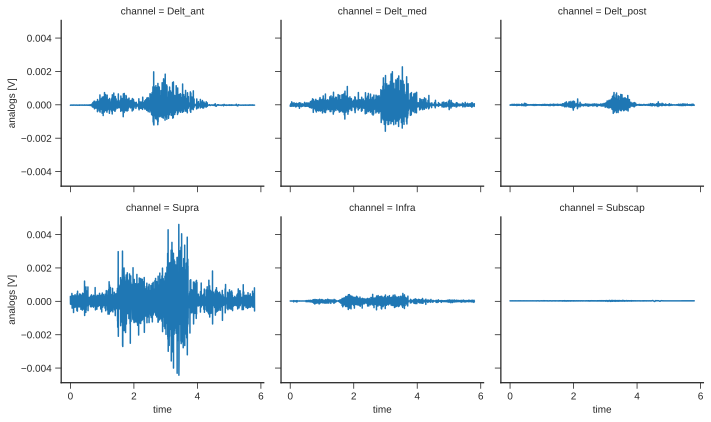

In [3]:
emg.plot(x="time", col="channel", col_wrap=3);

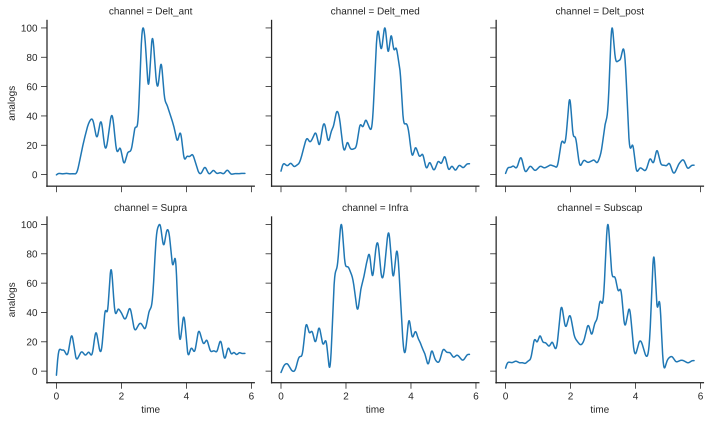

In [4]:
emg_processed = (
    emg.meca.band_pass(freq=emg.rate, order=2, cutoff=[10, 425])
    .meca.center()
    .meca.abs()
    .meca.low_pass(freq=emg.rate, order=4, cutoff=5)
    .meca.normalize()
)

emg_processed.plot(x="time", col="channel", col_wrap=3);

Text(0.5, 1.0, 'EMG activation distribution')

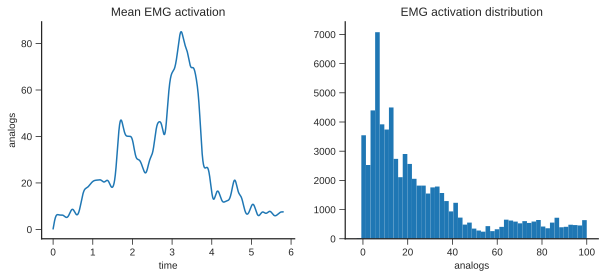

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

emg_processed.mean("channel").plot(ax=axes[0])
axes[0].set_title("Mean EMG activation")

emg_processed.plot.hist(ax=axes[1], bins=50)
axes[1].set_title("EMG activation distribution")